In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


C:\Users\DELL\AppData\Local\Temp\ipykernel_1528\1180866478.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1=df[["area_type","location","size","total_sqft","bath","balcony","price"]]

In [4]:
df1.isna().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [5]:
df.shape

(13320, 9)

In [6]:
df1.dropna(inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1528\3614008390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [7]:
df1["size"]=df1["size"].apply(lambda x : int(x.split(" ")[0]))

C:\Users\DELL\AppData\Local\Temp\ipykernel_1528\974924941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["size"]=df1["size"].apply(lambda x : int(x.split(" ")[0]))


In [8]:
df1["size"].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [9]:
df1.drop(df1[df1["size"]>20].index)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3,1715,3.0,3.0,112.00
13315,Built-up Area,Whitefield,5,3453,4.0,0.0,231.00
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4,4689,4.0,1.0,488.00


In [10]:
df1["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
def sqft_int(x):
    nums=x.split("-")
    if len(nums)==2: 
        return (float(nums[0])+float(nums[1]))/2
    try:
        return float(nums[0])
    except:
        return float(0)
df1["total_sqft"]=df1["total_sqft"].apply(lambda x: sqft_int(x))

C:\Users\DELL\AppData\Local\Temp\ipykernel_1528\1292258704.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["total_sqft"]=df1["total_sqft"].apply(lambda x: sqft_int(x))


In [12]:
df1["total_sqft"].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [13]:
df1["bath"].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [14]:
df1.drop(df1[df1["bath"]>20].index,inplace=True)
df1["bath"].unique()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1528\2484034515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1[df1["bath"]>20].index,inplace=True)


array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 11., 12., 10., 15.,
       13.])

In [15]:
df1["balcony"].unique()

array([1., 3., 2., 0.])

In [16]:
locations=df1["location"].unique()

In [17]:
df["price"].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [18]:
df1["price_per_sqft"]=df1["price"]*100000/df1["total_sqft"]

C:\Users\DELL\AppData\Local\Temp\ipykernel_1528\3772183402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["price_per_sqft"]=df1["price"]*100000/df1["total_sqft"]


In [19]:
df1["price_per_sqft"].unique()

array([ 3699.81060606,  4615.38461538,  4305.55555556, ...,
        6689.83492615,  5258.54513585, 10407.33631904])

In [20]:
df1["location"]=df1["location"].apply(lambda x:x.strip())

C:\Users\DELL\AppData\Local\Temp\ipykernel_1528\3507081302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["location"]=df1["location"].apply(lambda x:x.strip())


In [21]:
location_stats=df1.groupby("location")["location"].agg("count")
location_stats=location_stats.sort_values(ascending=False)
location_stats

location
Whitefield               515
Sarjapur  Road           372
Electronic City          302
Kanakpura Road           261
Thanisandra              234
                        ... 
Kanakapura Main Road       1
Kanakapura Road            1
Kanakapura Road,           1
Kanakapura main  Road      1
whitefiled                 1
Name: location, Length: 1253, dtype: int64

In [22]:
len(location_stats[location_stats<=10])

1016

In [23]:
locations_less_than_10=location_stats[location_stats<=10]

In [24]:
df1["location"]=df1["location"].apply(lambda x: "other" if x in locations_less_than_10 else x)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1528\451755751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["location"]=df1["location"].apply(lambda x: "other" if x in locations_less_than_10 else x)


In [25]:
len(df1["location"].unique())

238

In [26]:
df1.drop(df1[df1["total_sqft"]==0].index,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1528\3409617106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1[df1["total_sqft"]==0].index,inplace=True)


In [27]:
df1[(df1["total_sqft"]/df1["size"])<80]

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
349,Plot Area,other,3,11.0,3.0,2.0,74.0,6.727273e+05
770,Plot Area,other,9,600.0,9.0,3.0,190.0,3.166667e+04
857,Plot Area,Vijayanagar,8,600.0,4.0,1.0,72.0,1.200000e+04
992,Plot Area,Rajaji Nagar,4,315.0,4.0,2.0,90.0,2.857143e+04
1020,Carpet Area,other,1,15.0,1.0,0.0,30.0,2.000000e+05
1122,Built-up Area,other,5,24.0,2.0,2.0,150.0,6.250000e+05
4972,Built-up Area,other,7,5.0,7.0,3.0,115.0,2.300000e+06
5970,Plot Area,Mysore Road,1,45.0,1.0,0.0,23.0,5.111111e+04
6068,Plot Area,other,8,600.0,6.0,2.0,60.0,1.000000e+04
10008,Plot Area,other,8,600.0,4.0,3.0,175.0,2.916667e+04


In [28]:
df2=df1[~(df1["total_sqft"]/df1["size"]<300)]

In [29]:
df2[(df2["total_sqft"]/df2["size"])<300]

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft


In [30]:
df2.shape

(12013, 8)

In [31]:
df2["price_per_sqft"].describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.mean(subdf.price_per_sqft)
        reduced_df=subdf[(subdf["price_per_sqft"]>(m-st))&(subdf["price_per_sqft"]<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out    

In [33]:
df3=remove_outliers(df2)
df3.shape

(11611, 8)

(array([1.096e+03, 7.597e+03, 2.124e+03, 5.210e+02, 1.860e+02, 5.800e+01,
        2.100e+01, 6.000e+00, 1.000e+00, 1.000e+00]),
 array([  267.82981328,  3441.04683196,  6614.26385063,  9787.4808693 ,
        12960.69788797, 16133.91490664, 19307.13192531, 22480.34894399,
        25653.56596266, 28826.78298133, 32000.        ]),
 <BarContainer object of 10 artists>)

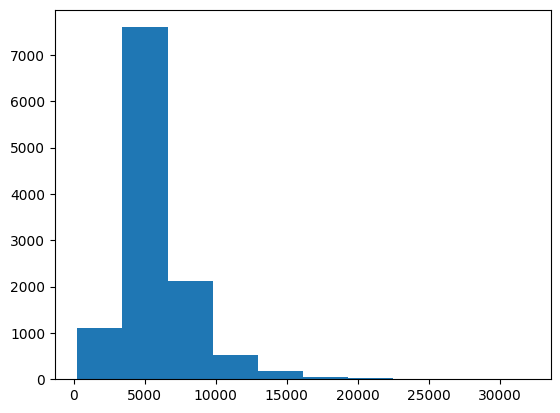

In [34]:
plt.hist(df3.price_per_sqft)

In [35]:
df4=df3.drop(df3[df3["price_per_sqft"]>10000].index)

In [36]:
df4.shape

(10899, 8)

In [37]:
df4.bath.unique()

array([ 3.,  4.,  2.,  5.,  1.,  8.,  7.,  6.,  9., 10., 13.])

In [38]:
df4[df4["bath"]>=10]

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
6064,Built-up Area,Munnekollal,10,7200.0,10.0,3.0,200.0,2777.777778
8433,Super built-up Area,Vidyaranyapura,9,4700.0,10.0,3.0,130.0,2765.957447
11022,Super built-up Area,other,13,5425.0,13.0,0.0,275.0,5069.124424


In [39]:
df5=df4.drop(df4[df4["bath"]>=df4["size"]+2].index)

In [40]:
df5["bath"].unique()

array([ 3.,  4.,  2.,  5.,  1.,  8.,  7.,  6.,  9., 10., 13.])

In [41]:
df5[df5["bath"]>=10]

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
6064,Built-up Area,Munnekollal,10,7200.0,10.0,3.0,200.0,2777.777778
8433,Super built-up Area,Vidyaranyapura,9,4700.0,10.0,3.0,130.0,2765.957447
11022,Super built-up Area,other,13,5425.0,13.0,0.0,275.0,5069.124424


In [42]:
df5.head()


,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
4,Super built-up Area,1st Block Jayanagar,2,1000.0,3.0,2.0,60.0,6000.000000
9,Super built-up Area,1st Phase JP Nagar,4,2825.0,4.0,3.0,250.0,8849.557522
10,Super built-up Area,1st Phase JP Nagar,3,1875.0,3.0,1.0,167.0,8906.666667
13,Super built-up Area,1st Phase JP Nagar,2,1394.0,2.0,1.0,100.0,7173.601148
14,Super built-up Area,1st Phase JP Nagar,2,1077.0,2.0,2.0,93.0,8635.097493


In [43]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df5)
# df8 = df7.copy()
df5.shape

(7853, 8)

In [44]:
df5.drop(["area_type","price_per_sqft"],axis=1,inplace=True)

In [45]:
df5.shape

(7853, 6)

In [46]:
df5.head()

,location,size,total_sqft,bath,balcony,price
4,1st Block Jayanagar,2,1000.0,3.0,2.0,60.0
9,1st Phase JP Nagar,4,2825.0,4.0,3.0,250.0
10,1st Phase JP Nagar,3,1875.0,3.0,1.0,167.0
13,1st Phase JP Nagar,2,1394.0,2.0,1.0,100.0
14,1st Phase JP Nagar,2,1077.0,2.0,2.0,93.0


In [47]:
df5.drop(["balcony"],axis=1,inplace=True)

In [48]:
df5.shape

(7853, 5)

In [49]:
dummies=pd.get_dummies(df5["location"])
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11603,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11605,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11606,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11607,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [50]:
df6=pd.concat([df5,dummies.drop(["other"],axis=1)],axis=1)

In [51]:
df6.shape

(7853, 241)

In [52]:
df6.head()

,location,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
4,1st Block Jayanagar,2,1000.0,3.0,60.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1st Phase JP Nagar,4,2825.0,4.0,250.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,1st Phase JP Nagar,3,1875.0,3.0,167.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,1st Phase JP Nagar,2,1394.0,2.0,100.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,1st Phase JP Nagar,2,1077.0,2.0,93.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df7=df6.drop(["location"],axis=1)

In [54]:
df7.head()

,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
4,2,1000.0,3.0,60.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,4,2825.0,4.0,250.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,3,1875.0,3.0,167.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,2,1394.0,2.0,100.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,2,1077.0,2.0,93.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
X=df7.drop(["price"],axis=1)

In [56]:
Y=df7["price"]

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [59]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.5912922657436042

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([ 7.56213760e-01,  7.92629915e-01, -4.83568453e+14,  7.81800766e-01,
        6.23939297e-01])

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,Y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{}
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2,3,4,5],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model':algo_name,
            'best_score':round(gs.best_score_,2),
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])    

In [62]:
find_best_model(X,Y)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", l

,model,best_score,best_params
0,linear_regression,-9.671369e+13,{}
1,lasso,7.000000e-01,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,7.700000e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [68]:
def predict_price(location,sqft,bath,size):
    loc_index=np.where(X.columns==location)[0][0]

    x=np.zeros(len(X.columns))
    x[0]=size
    x[1]=sqft
    x[2]=bath
    if loc_index>=0:
        x[loc_index]=1
    return lr.predict([x])[0]    

In [64]:
predict_price('1st Phase JP Nagar',1000,2,2)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.56613434539395

In [73]:
import pickle
with open("pkl_model.pkl",'wb') as f:
    pickle.dump(lr,f)

['model.pkl']

In [66]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))

In [74]:
predict_price("1st Phase JP Nagar",1000,2,2)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.56613434539395